In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
# %aimport main
# %aimport train
# %aimport data
import main, train, data, models
%aimport jax

In [5]:
config_dict = {
        'image_path': "../../datasets/stickman/f",
        'ext': 'png',
        'train_split': 0.6,
        'image_size': 32,
        'conv_widths': [16,32],
        'mlp_width': 392,
        'unflatten_shape': (8,8,16),
        'num_channels': 3,
        'num_bits': 5,
        'batch_size': 40,
        'sampling_temperature': 0.7,
        'init_lr': 1e-3,
        'num_epochs': 13,
        'num_warmup_epochs': 1,
        'num_sample_epochs': 1, # Fractional epochs for sampling because one epoch is quite long 
        'num_save_epochs': 5,
    }

20000 training images
500 training steps per epoch


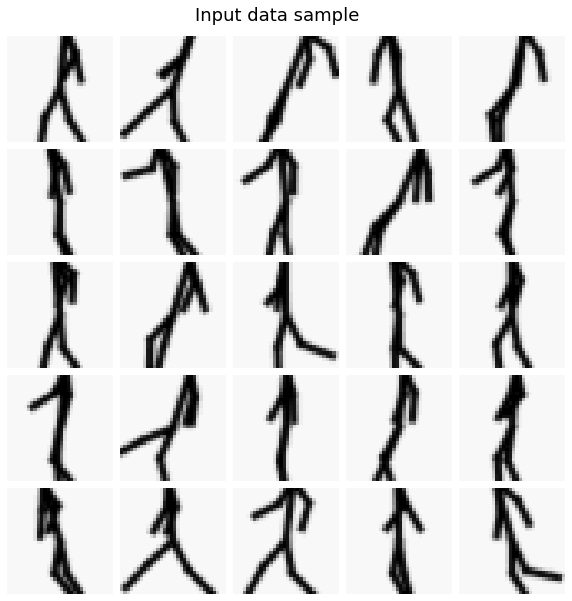

In [6]:
train_ds, val_ds = data.setup_data(config_dict,show_grid=True)

In [6]:
random_key = jax.random.PRNGKey(0)

model = models.vanilla(
                conv_widths = config_dict['conv_widths'],
                mlp_width = config_dict['mlp_width'],
                unflatten_shape = config_dict['unflatten_shape'],
                )

In [7]:
@jax.jit
def init(d):
    return model.init_with_output(random_key, d)

In [7]:
d = next(train_ds)
d.shape

(40, 32, 32, 3)

In [ ]:
out = init(d)

In [8]:
model, params = train.train(train_ds, val_ds=val_ds, **config_dict)

Start training...
Available jax devices: [GpuDevice(id=0, process_index=0)]



ValueError: not enough values to unpack (expected 3, got 2)